<a href="https://colab.research.google.com/github/PalakAggarwal13/ML_Projects/blob/main/Project_13_CustomerSegmentation/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (8).zip to archive (8).zip


In [3]:
import zipfile

with zipfile.ZipFile('archive (8).zip','r') as zip_ref:
  zip_ref.extractall('customer_data')

import os
print(os.listdir('customer_data'))

['Mall_Customers.csv']


In [4]:
df = pd.read_csv('customer_data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
x = df.iloc[:,[3,4]].values

In [11]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

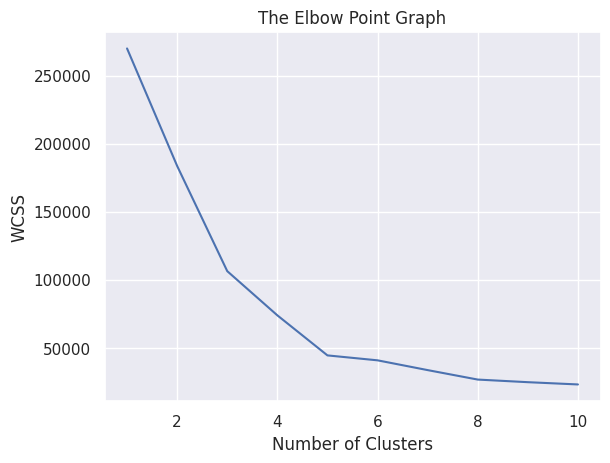

In [12]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5 , init='k-means++' , random_state=42)

In [15]:
Y = kmeans.fit_predict(x)

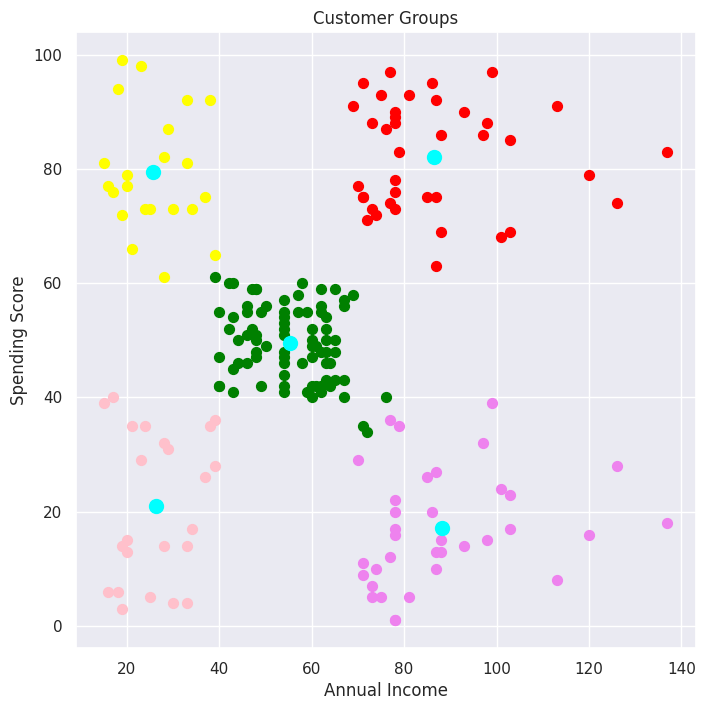

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0],x[Y==0,1] ,s=50,c='green',label='Cluster 1')
plt.scatter(x[Y==1,0],x[Y==1,1] ,s=50,c='red',label='Cluster 2')
plt.scatter(x[Y==2,0],x[Y==2,1] ,s=50,c='yellow',label='Cluster 3')
plt.scatter(x[Y==3,0],x[Y==3,1] ,s=50,c='violet',label='Cluster 4')
plt.scatter(x[Y==4,0],x[Y==4,1] ,s=50,c='pink',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()